# The Gender Pay Gap — Analyzing Earning Based on College Majors

## The Dataset

The data orginated from American Community Survey, but it was cleaned and aggregated by FiveThirtyEight on their Github repo [¹](https://github.com/fivethirtyeight/data/tree/master/college-majors). The dataset is on job outcomes of students under the age of 28 who graduated from college between 2010 and 2012.

## Background

The U.S Bureau of Labor Statistics states that the average woman's unadjusted annual salary is around 78% to 82% of that of the average man's annual salary. According to the statistic, for every dollar a man makes, a woman can only make around 78 to 82 cent of that dollar. However, if we take voluntary choices into account like college major, occupation, and maternal leave, females earn around 94 cents to every dollar earned by males. The remaining six percents is said to be due to gender discriminations and/or wage negotiation skills.

## Project Goal

With the U.S BLS [²](https://www.bls.gov/opub/ted/2017/womens-and-mens-earnings-by-age-in-2016.htm) and NBER [³](http://www.nber.org/papers/w21913.pdf), the National Bureau of Economic Research, releasing findings that shows that there is a pay gap between men and women, it would be illogical and near impossible to prove otherwise. It is undeniable that a pay gap exist, but does the pay gap actually matters? In one corner lies the argument that the gender pay gap exist because of gender discrimination and biases, and in the other corner lies the argument that the gender pay is inevitable due to personal choices. Despite the unadjusted and adjusted gender pay gap calculation, we are still debating the gender pay gap. In using a dataset of recent grads, we hope to proide a different insight into this topic of whether the gender gap matters.

Unlike other datasets used for gender pay gap calculation, both genders share the same median salary. Holding the median salary constant in each major, we also hold gender difference in wage negotiation skill, hours worked, and maternal leave constant. If we consider gender discrimination as a negative effect on wages, we effectively eliminate the effect of discrimination on wages by holding median salary constant. With all volunatary and involuntary factors held constant except major and occupation, we can observe the impact of career choices on earnings and the pay gap. Because our median salary is the same for both part time and full time, we will include both in our calculations. 

Along with calculating the unadjusted gender pay gap, we will calculate the adjusted gender pay gap taking occupation and major choices into account. We will use a simple linear regression model, Yᵢ = Maleᵢβ₁ + Xᵢβ₂ + εᵢ       [⁴](https://www.glassdoor.com/research/app/uploads/sites/2/2017/04/GlassdoorHowtoAnalyzeGenderPayGap.pdf), to calculate the adjusted gender pay gap to see if discrimination plays an important role in the pay gap even if the median salary is the same for both gender. We will also use visualizations to aid in the understanding of our analysis.

## Setting up the Environment 

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Importing the Data

In [5]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


## Data Cleaning and Pre-processing

### Cleaning NaN

In [6]:
# checking for null values
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
# the rows with nan values
nan_rows = recent_grads[recent_grads.isnull().any(axis = 1)]
nan_rows.iloc[0,:]

Rank                                                 22
Major_code                                         1104
Major                                      FOOD SCIENCE
Total                                               NaN
Men                                                 NaN
Women                                               NaN
Major_category          Agriculture & Natural Resources
ShareWomen                                          NaN
Sample_size                                          36
Employed                                           3149
Full_time                                          2558
Part_time                                          1121
Full_time_year_round                               1735
Unemployed                                          338
Unemployment_rate                             0.0969315
Median                                            53000
P25th                                             32000
P75th                                           

In [8]:
# dropping the nan values
recent_grads.dropna(inplace = True)

In [9]:
# the num of rows after nan removal
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

## Unadjusted Pay Gap

### Gender Pay Gap Calculation

In [10]:
# avg pay of women
women_total_salary = sum(recent_grads["Women"] * recent_grads["Median"])
women_avg_salary = women_total_salary/sum(recent_grads["Women"])
women_avg_salary

36299.571706713956

In [11]:
# avg pay of men
men_total_salary = sum(recent_grads["Men"] * recent_grads["Median"])
men_avg_salary = women_total_salary/sum(recent_grads["Men"])
men_avg_salary

49156.52552855523

In [12]:
# gender pay gap
diff_pay = men_avg_salary - women_avg_salary
pay_gap = diff_pay/men_avg_salary
pay_gap

0.2615513135559716

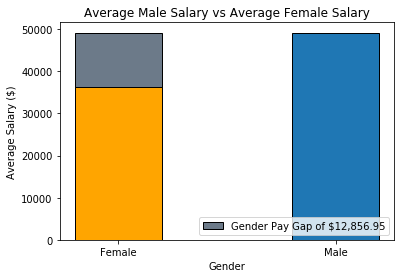

In [13]:
fig, ax = plt.subplots()

# bar graph of difference in pay
ax.bar(height = diff_pay + women_avg_salary, 
       x = ["Female"], width = 0.4, 
       edgecolor = "black", color = "#6C7A89", 
       label ="Gender Pay Gap of ${:,.2f}".format(diff_pay)
       )
# bar graph of male avg salary
ax.bar(height = [men_avg_salary], 
        x = ["Male"], width = 0.4,
        edgecolor = "black", color = "C0"
      )
# bar graph of female avg salary
ax.bar(height = [women_avg_salary], 
        x = ["Female"], width = 0.4,
        edgecolor = "black", color = "Orange"
      )

ax.set_title("Average Male Salary vs Average Female Salary")
ax.set_xlabel("Gender")
ax.set_ylabel("Average Salary ($)")

plt.legend(loc = "lower right")

Because we are not given the number of males and females employed, we couldn't calculate the average salary for both genders using the number of people employed. Instead, the average salaries were calculated under the assumption that all the males and females in their majors are employed. We get a pay gap of 26% meaning that a woman only makes 74 cents to every dollar a man makes.

### Culprit of Unadjusted Gap - College Major

In [14]:
# the total num of women and men in dataset
total_men = sum(recent_grads["Men"])
total_women = sum(recent_grads["Women"])

In [15]:
# total men pop
total_men

2876426.0

In [16]:
# total women pop
total_women

3895228.0

### Women Dominant Field vs Men Dominant Field

#### Women Dominant Field of Study

In [17]:
# find women dominant field of study
women_dominant = recent_grads[recent_grads["ShareWomen"] >= 0.6]
women_dominant_fields = women_dominant["Major_category"]
women_dominant_fields.value_counts() # gives the number of female dominant majors in field

Education                              14
Health                                 11
Humanities & Liberal Arts              11
Psychology & Social Work                9
Arts                                    5
Biology & Life Science                  5
Social Science                          4
Business                                3
Communications & Journalism             3
Agriculture & Natural Resources         2
Physical Sciences                       2
Interdisciplinary                       1
Industrial Arts & Consumer Services     1
Law & Public Policy                     1
Name: Major_category, dtype: int64

#### Men Dominant Field of Study

In [18]:
# find men dominant field of study
men_dominant = recent_grads[(1 - recent_grads["ShareWomen"]) >= 0.6]
men_dominant_fields = men_dominant["Major_category"]
men_dominant_fields.value_counts() # gives the number of male dominant majors in field

Engineering                            27
Computers & Mathematics                 8
Agriculture & Natural Resources         6
Industrial Arts & Consumer Services     4
Physical Sciences                       3
Business                                3
Social Science                          2
Law & Public Policy                     1
Humanities & Liberal Arts               1
Name: Major_category, dtype: int64

#### Women in the field of industrial arts and consumer services

In [19]:
# women major in the field of industrial arts and consumer services
women_dominant[women_dominant_fields == "Industrial Arts & Consumer Services"]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
150,151,2901,FAMILY AND CONSUMER SCIENCES,58001.0,5166.0,52835.0,Industrial Arts & Consumer Services,0.910933,518,46624,...,15872,26906,3355,0.067128,30000,22900,40000,20985,20133,5248


#### Men in the field of industrial arts and consumer services

In [20]:
# men major in the field of industrial arts and consumer services
men_dominant[men_dominant_fields == "Industrial Arts & Consumer Services"]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
75,76,5701,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",2435.0,1869.0,566.0,Industrial Arts & Consumer Services,0.232444,37,2107,...,287,1752,64,0.029480,38400,22500,45000,221,1659,81
106,107,5901,TRANSPORTATION SCIENCES AND TECHNOLOGIES,15150.0,13257.0,1893.0,Industrial Arts & Consumer Services,0.124950,180,12266,...,2633,9170,962,0.072725,35000,22000,52000,4575,6147,557


Although Industrial Arts & Consumer Services is a field with both STEM and Non-STEM majors, females are dominant in a social science while the male dominant majors are STEM majors. Even though Industrial Arts & Consumer Services have higher paying opportunities, the female dominant major has the lowest pay in the field. This difference in career interest is apparent in the male and female dominant fields. Women are more involved in Non-STEM majors like nursing, humanities, and teaching while men are more involved in STEM majors like engineering and computer science. Women do have dominant majors in STEM majors like biology and physics, but there are not enough women in STEM fields and not enough women in higher paying STEM fields like engineering to close the pay gap.

### Proportion of Male and Female in Men Dominant Fields

In [21]:
# finding the proportion of male and female in men dominant fields
proportion_men_field = {} # key = field of study, value = [male proportion, female proportion]

for field in men_dominant_fields.value_counts().index:
    selected_field = men_dominant[men_dominant["Major_category"] == field]

    total_men_in_field = sum(selected_field["Men"])
    total_women_in_field = sum(selected_field["Women"])
    
    men_proportion_in_field = total_men_in_field/ total_men
    women_proportion_in_field = total_women_in_field/ total_women
   
    proportion_men_field[field] = [men_proportion_in_field, women_proportion_in_field]
proportion_men_field 

{'Agriculture & Natural Resources': [0.009926554689743452,
  0.0034932486622092467],
 'Business': [0.0474362976833056, 0.01758664704607792],
 'Computers & Mathematics': [0.056672759876318736, 0.01345389794897757],
 'Engineering': [0.13017439002428707, 0.026127097053112166],
 'Humanities & Liberal Arts': [0.006471920362282916, 0.002975692308640213],
 'Industrial Arts & Consumer Services': [0.011149252579416262,
  0.001062068767219788],
 'Law & Public Policy': [0.00030489225170402434, 6.957230744901197e-05],
 'Physical Sciences': [0.009288610240624998, 0.002799065934009511],
 'Social Science': [0.03516620973388504, 0.014523925172031008]}

In [22]:
# the proportion of men and women in male dominant fields
men_proportion_men_field = {key: value[0] for (key, value) in proportion_men_field.items()}
women_proportion_men_field = {key: value[1] for (key, value) in proportion_men_field.items()}

# sorted by proportion of men in male dominant fields in descending order
men_in_men_dominant = sorted(men_proportion_men_field.items(), key = lambda x: x[1], reverse = True)
women_in_men_dominant = ([(key, women_proportion_men_field[key]) for key, value in men_in_men_dominant])

#### the proportion of men out of total pop in each men dominant field

In [23]:
# the proportion of men out of the total pop in each men dominant field
men_in_men_dominant

[('Engineering', 0.13017439002428707),
 ('Computers & Mathematics', 0.056672759876318736),
 ('Business', 0.0474362976833056),
 ('Social Science', 0.03516620973388504),
 ('Industrial Arts & Consumer Services', 0.011149252579416262),
 ('Agriculture & Natural Resources', 0.009926554689743452),
 ('Physical Sciences', 0.009288610240624998),
 ('Humanities & Liberal Arts', 0.006471920362282916),
 ('Law & Public Policy', 0.00030489225170402434)]

#### the proportion of women out of total pop in each men dominant field

In [24]:
# the proportion of women out of the total pop in each men dominant field
women_in_men_dominant

[('Engineering', 0.026127097053112166),
 ('Computers & Mathematics', 0.01345389794897757),
 ('Business', 0.01758664704607792),
 ('Social Science', 0.014523925172031008),
 ('Industrial Arts & Consumer Services', 0.001062068767219788),
 ('Agriculture & Natural Resources', 0.0034932486622092467),
 ('Physical Sciences', 0.002799065934009511),
 ('Humanities & Liberal Arts', 0.002975692308640213),
 ('Law & Public Policy', 6.957230744901197e-05)]

### Proportion of Male and Female in Women Dominant Fields

In [25]:
# finding the percent of male and female in women dominant fields
proportion_women_field = {} # key = field of study, value = [male proportion, female proportion]

for field in women_dominant_fields.value_counts().index:
    selected_field = women_dominant[women_dominant["Major_category"] == field]

    total_men_in_field = sum(selected_field["Men"])
    total_women_in_field = sum(selected_field["Women"])
    
    men_proportion_in_field = total_men_in_field/ total_men
    women_proportion_in_field = total_women_in_field/ total_women
    proportion_women_field[field] = [men_proportion_in_field, women_proportion_in_field]
proportion_women_field 

{'Agriculture & Natural Resources': [0.001999356145438819,
  0.004443899047757923],
 'Arts': [0.027865830721874995, 0.04473216972151566],
 'Biology & Life Science': [0.04474059127542304, 0.050808322388317194],
 'Business': [0.034850540219007894, 0.04444155772139654],
 'Communications & Journalism': [0.037274381472007276, 0.05970382221528496],
 'Education': [0.027084305314998544, 0.11111339310561538],
 'Health': [0.024334364937599648, 0.09768208690223011],
 'Humanities & Liberal Arts': [0.049455122433186186, 0.08758486024438107],
 'Industrial Arts & Consumer Services': [0.001795978759752554,
  0.013564032708740027],
 'Interdisciplinary': [0.000979340334150783, 0.002433490414425035],
 'Law & Public Policy': [0.0015418439410574095, 0.0023343948030769956],
 'Physical Sciences': [0.0004449966729545624, 0.000835381138151605],
 'Psychology & Social Work': [0.03411003794291944, 0.09829771196962027],
 'Social Science': [0.01747689667663969, 0.029827522291378066]}

In [26]:
# the proportion of men and women in female dominant fields
men_proportion_women_field = {key: value[0] for (key, value) in proportion_women_field.items()}
women_proportion_women_field = {key: value[1] for (key, value) in proportion_women_field.items()}

# sorted by proportion of women in female dominant fields in descending order
women_in_women_dominant = sorted(women_proportion_women_field.items(), key = lambda x: x[1], reverse = True)
men_in_women_dominant = ([(key, men_proportion_women_field[key]) for key, value in women_in_women_dominant])

#### the proportion of women out of total pop in each women dominant field

In [27]:
# the proportion of women out of the total pop in each women dominant field
women_in_women_dominant

[('Education', 0.11111339310561538),
 ('Psychology & Social Work', 0.09829771196962027),
 ('Health', 0.09768208690223011),
 ('Humanities & Liberal Arts', 0.08758486024438107),
 ('Communications & Journalism', 0.05970382221528496),
 ('Biology & Life Science', 0.050808322388317194),
 ('Arts', 0.04473216972151566),
 ('Business', 0.04444155772139654),
 ('Social Science', 0.029827522291378066),
 ('Industrial Arts & Consumer Services', 0.013564032708740027),
 ('Agriculture & Natural Resources', 0.004443899047757923),
 ('Interdisciplinary', 0.002433490414425035),
 ('Law & Public Policy', 0.0023343948030769956),
 ('Physical Sciences', 0.000835381138151605)]

#### the proportion of men out of total pop in each women dominant field

In [28]:
# the proportion of women out of the total pop in each women dominant field
men_in_women_dominant

[('Education', 0.027084305314998544),
 ('Psychology & Social Work', 0.03411003794291944),
 ('Health', 0.024334364937599648),
 ('Humanities & Liberal Arts', 0.049455122433186186),
 ('Communications & Journalism', 0.037274381472007276),
 ('Biology & Life Science', 0.04474059127542304),
 ('Arts', 0.027865830721874995),
 ('Business', 0.034850540219007894),
 ('Social Science', 0.01747689667663969),
 ('Industrial Arts & Consumer Services', 0.001795978759752554),
 ('Agriculture & Natural Resources', 0.001999356145438819),
 ('Interdisciplinary', 0.000979340334150783),
 ('Law & Public Policy', 0.0015418439410574095),
 ('Physical Sciences', 0.0004449966729545624)]

### Visualization of M/F Proportions in M/F Dominant Fields

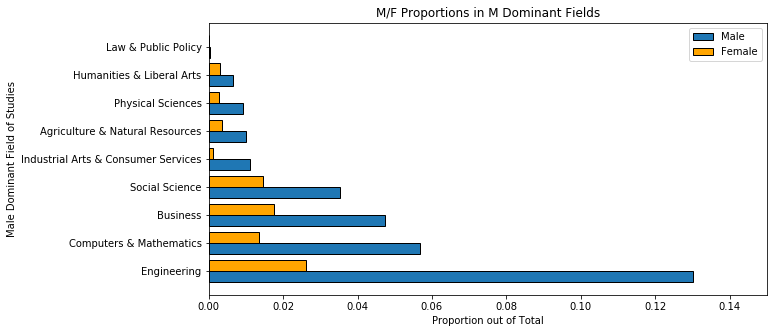

In [29]:
# creating the container and subplots
fig, ax1 = plt.subplots(figsize = (10,5))

# the y loc for the male dominant group
y_loc1 = np.arange(len(men_dominant_fields.value_counts()))

# bar graph of male proportion in male dominant fields
ax1.barh(y = y_loc1, 
         width = list([value for key, value in men_in_men_dominant]), # get the proportion of male
         height = 0.4, color = "C0", label = "Male", edgecolor = "black")

# bar graph of female proportion in male dominant fields
ax1.barh(y = y_loc1 + 0.4, 
         width = list([value for key, value in women_in_men_dominant]), # get the proportion of female
         height = 0.4, color = "Orange", label = "Female", edgecolor = "black")

ax1.set_yticks(y_loc1 + 0.4/2)
ax1.set_yticklabels([key for key, value in men_in_men_dominant]) # get the field of study 

ax1.set_xlim(0, 0.15)

ax1.set_ylabel("Male Dominant Field of Studies")
ax1.set_xlabel("Proportion out of Total")
ax1.set_title("M/F Proportions in M Dominant Fields")

ax1.legend()

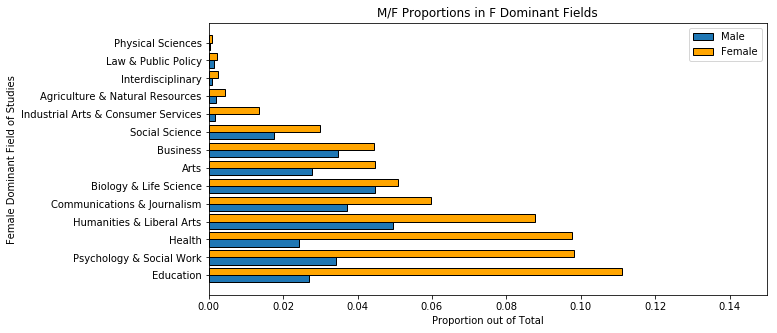

In [30]:
# creating the container and subplots
fig, ax2 = plt.subplots(figsize = (10,5))

# the y loc for the female dominant group
y_loc2 = np.arange(len(women_dominant_fields.value_counts()))

# bar graph of male proportion in female dominant fields
ax2.barh(y = y_loc2, 
         width = list([value for key, value in men_in_women_dominant]), # get the proportion of male,
         height = 0.4, color = "C0", label = "Male", edgecolor = "black")

# bar graph of female proportion in female dominant fields
ax2.barh(y = y_loc2 + 0.4, 
         width = list([value for key, value in women_in_women_dominant]), # get the proportion of female
         height = 0.4, color = "Orange", label = "Female", edgecolor = "black")

ax2.set_yticks(y_loc2 + 0.4/2)
ax2.set_yticklabels([key for key, value in men_in_women_dominant]) # get the field of study 

ax2.set_xlim(0, 0.15)

ax2.set_ylabel("Female Dominant Field of Studies")
ax2.set_xlabel("Proportion out of Total")
ax2.set_title("M/F Proportions in F Dominant Fields")

ax2.legend()

Besides Industrial Arts & Consumer Services, there are fields that are female and male dominant fields with female and male dominant majors. We will further explore the majors and median salaries in these fields.

### Visualization of M/F Dominant Majors and Median($)

__Below is the visualization of majors in fields with both dominant male and female majors__

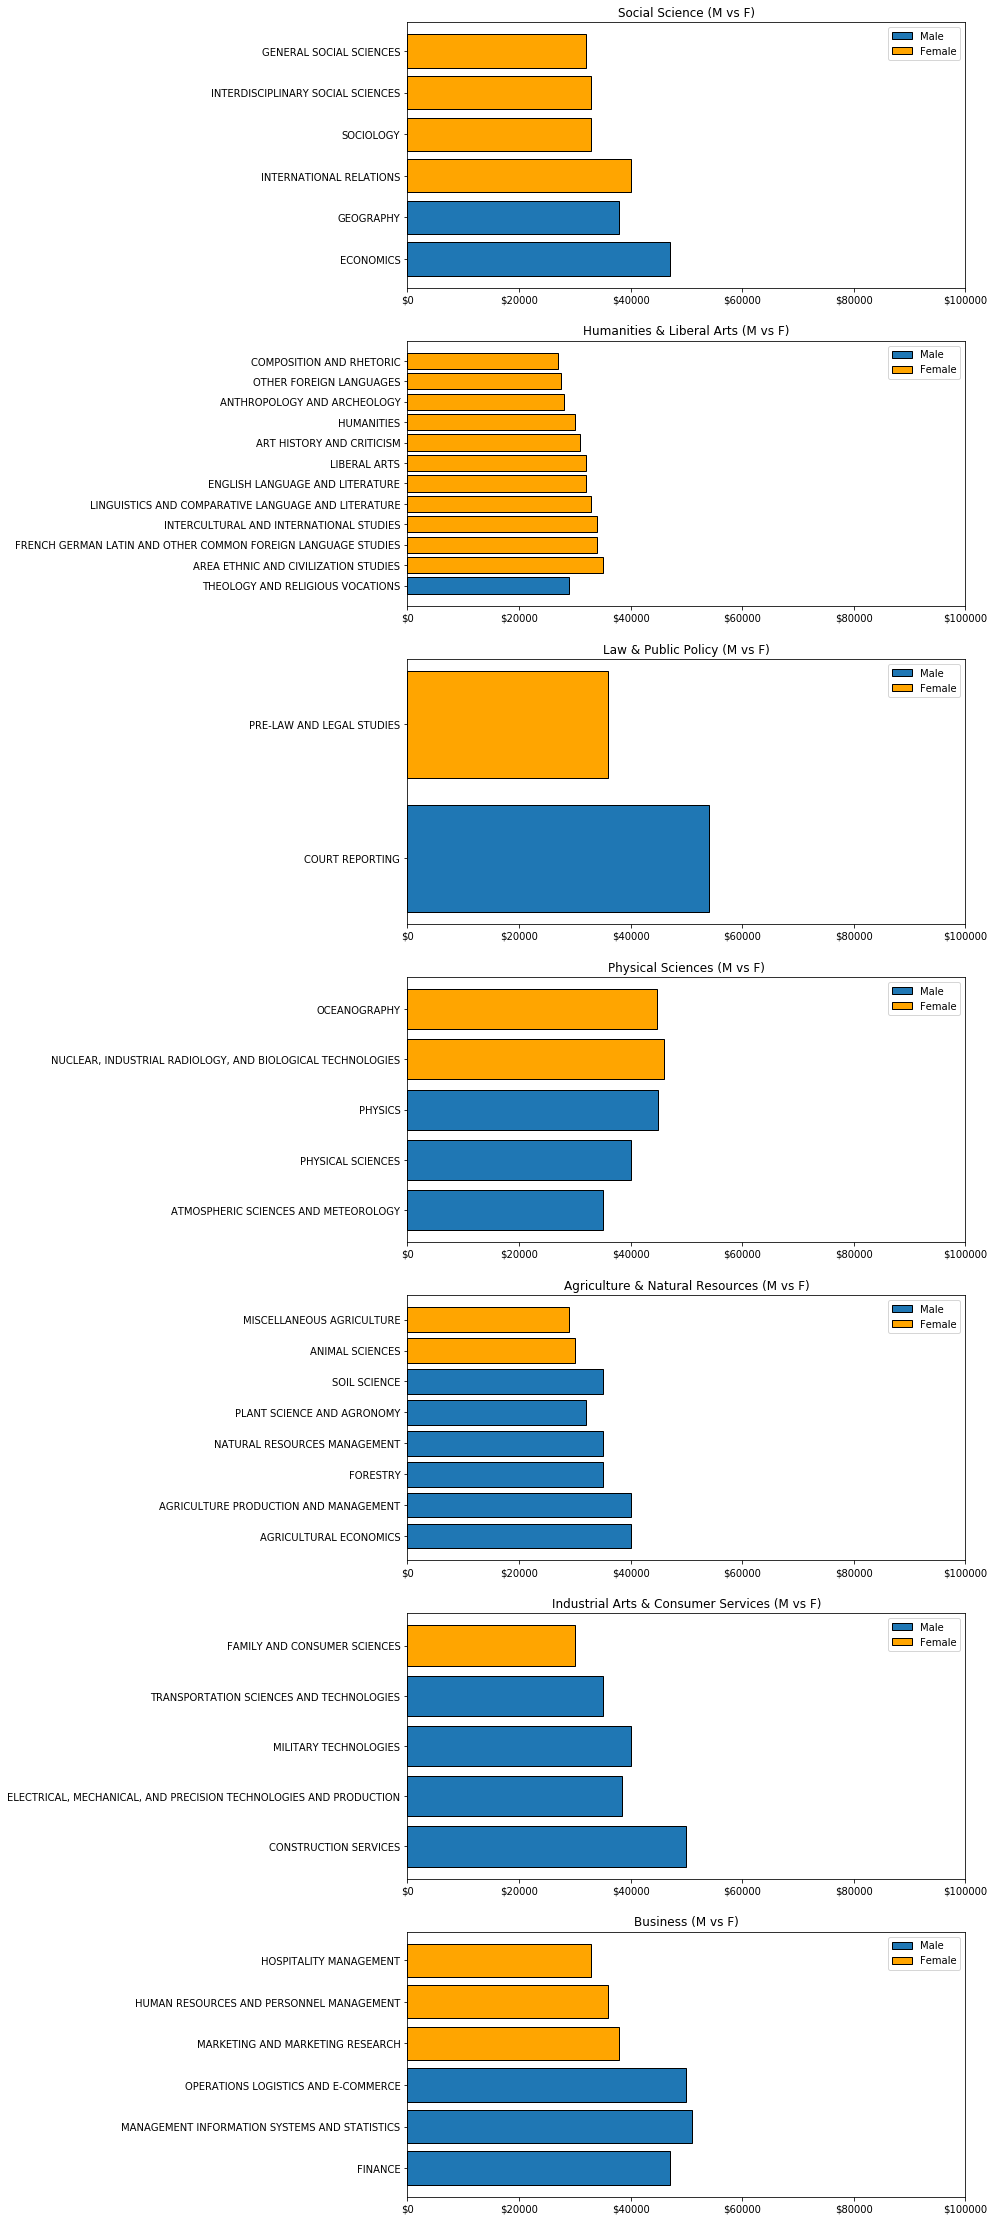

In [31]:
# fields with both m/f dominant majors
mf_fields = set(proportion_women_field).intersection(set(proportion_men_field)) # finds common keys

# visualization of m/f dominant majors
fig = plt.figure(figsize = (10,40))

num_rows = len(mf_fields)
num_cols = 1
i = 1

for field in mf_fields:
    # gender dominant majors and its median 
    male_d = men_dominant[men_dominant_fields == field][["Major", "Median"]]
    female_d = women_dominant[women_dominant_fields == field][["Major", "Median"]]
    
    ax = fig.add_subplot(num_rows, num_cols, i) # adding the subplot to the container
    
    ax.barh(y = male_d["Major"], width = male_d["Median"], 
            color = "C0", edgecolor = "black", label = "Male")
    ax.barh(y = female_d["Major"], width = female_d["Median"], 
             color = "Orange", edgecolor = "black", label = "Female")
   
    # adding the dollar sign to median salary
    ax.set_xticklabels(["$" + str(salary) for salary in (range(0,100001, 20000))]) 
    
    ax.set_xlim(0,100000) # setting the x value range
    ax.set_title(field + " (M vs F)")
    ax.legend()
    
    i = i + 1 # iterates the plot number

We see that for fields that have STEM majors, there are more male dominant majors than there are female dominant majors. Even for non STEM fields, men are dominant in STEM oriented majors while women are dominant in majors centered around people. We also say that men are dominant in majors with higher median salaries. However, we can't use the same reasoning to explain the dominant majors in the Physical Sciences field. Although there are more male dominant physical science majors than that of female's, the average median salaries of the female dominant majors are higher than their male counter part. The median salary of international relations is also higher than than of geography's, but international relations is a female dominant major. Encouraging women to pursue higher paying majors and STEM fields is definitely the right thing to do to minimize the gender pay gap, but not everyone wants to pursue these types of careers. It seems that women's career choices are determined by their own interest and men's career choices are more driven by money.

### Avg Median Salaries of M/F Majors

#### the average salary of male dominant majors

In [32]:
# average salary of male dominant majors
num_male_major = sum(men_dominant["Men"])

total_male_major_salary = sum(men_dominant["Men"] * men_dominant["Median"]) 
avg_male_major_salary = total_male_major_salary/num_male_major 
avg_male_major_salary

50749.24253248152

#### the average salary of female dominat majors

In [33]:
# average salary of female dominant majors
num_female_major = sum(women_dominant["Women"])

total_female_major_salary = sum(women_dominant["Women"] * women_dominant["Median"])
avg_female_major_salary = total_female_major_salary/num_female_major
avg_female_major_salary

34082.05401652335

#### the percentage of male dominat major out of total major in pop

In [34]:
# percentage of male dominant major out of total major
men_percent = (men_dominant.shape[0]/recent_grads.shape[0]) * 100
men_percent

31.976744186046513

#### the percentage of female dominant major out of total major in pop

In [35]:
# percentage of female dominant major out of total major
women_percent = (women_dominant.shape[0]/recent_grads.shape[0]) * 100
women_percent

41.86046511627907

Text(0.5,1,'Avg Median Salaries of M/F Majors')

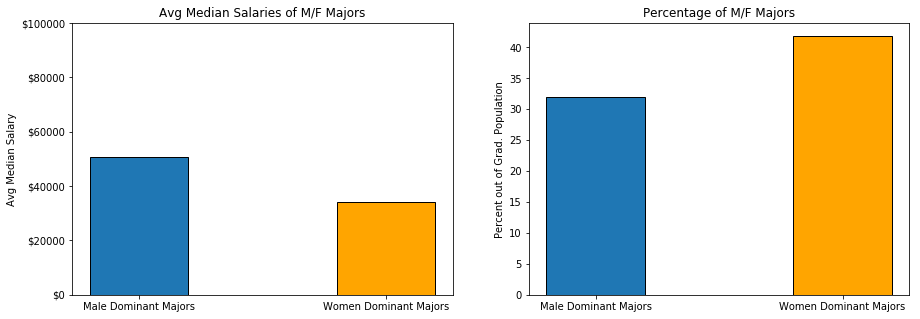

In [36]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# bar graph of male dominated major avg salaries
ax1.bar(height = [avg_male_major_salary],
       x = ["Male Dominant Majors"], width = 0.4, 
       edgecolor = "black", color = "C0", 
      )
# bar graph of female dominated major  
ax1.bar(height = [avg_female_major_salary], 
        x = ["Women Dominant Majors"], width = 0.4,
        edgecolor = "black", color = 'orange',
      )

# bar graph of male dominated major
ax2.bar(height = [men_percent],
       x = ["Male Dominant Majors"], width = 0.4, 
       edgecolor = "black", color = "C0", 
      )
# bar graph of female dominated major  
ax2.bar(height = [women_percent], 
        x = ["Women Dominant Majors"], width = 0.4,
        edgecolor = "black", color = 'Orange',
      )

plt.ylabel("Percent out of Grad. Population")
plt.title("Percentage of M/F Majors")

# adding the dollar sign
ax1.set_yticklabels(["$" + str(salary) for salary in (range(0,100001, 20000))]) 
ax1.set_ylim(0,100000)

ax1.set_ylabel("Avg Median Salary")
ax1.set_title("Avg Median Salaries of M/F Majors")


There are more women with college educations than men and around 40% of all the majors are women dominant. While only 30% of all the majors are men dominant, the majors men majored in have higher paying occupations than that  of the majors women majored in.

### M/F Popular Field

In [37]:
# number of engineer regarding gender
male_engineer_num = sum(recent_grads[recent_grads["Major_category"] == "Engineering"]["Men"])
female_engineer_num = sum(recent_grads[recent_grads["Major_category"] == "Engineering"]["Women"])

In [38]:
# number of educator regarding gender
female_education_num = sum(recent_grads[recent_grads["Major_category"] == "Education"]["Women"])
male_education_num = sum(recent_grads[recent_grads["Major_category"] == "Education"]["Men"])

#### the avg median salary of engineer

In [39]:
# the avg median salary of engineer
engineering_avg = np.mean(recent_grads[recent_grads["Major_category"] == "Engineering"]["Median"])
engineering_avg

57382.75862068965

#### the avg median salary of educator

In [40]:
# the avg median salary of educator
education_avg = np.mean(recent_grads[recent_grads["Major_category"] == "Education"]["Median"])
education_avg

32350.0

Text(0,0.5,'Avg Salary')

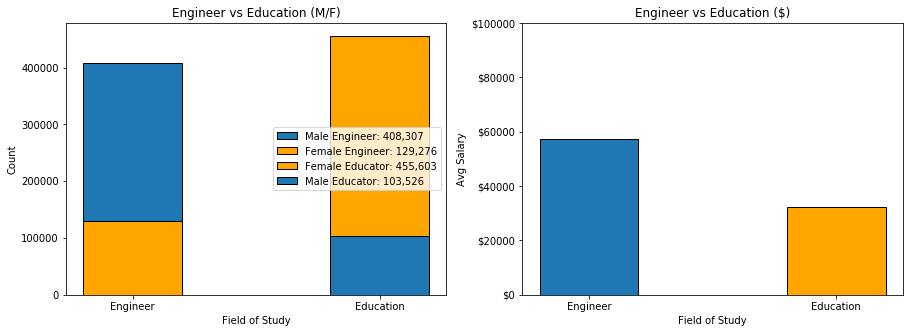

In [41]:
# creating the container and subplots
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# bar graph of male engineer
ax1.bar(height = [male_engineer_num],
       x = ["Engineer"], width = 0.4, 
       edgecolor = "black", color = "C0", 
       label = "Male Engineer: {:,.0f}".format(male_engineer_num)
      )
# bar graph of female engineer   
ax1.bar(height = [female_engineer_num], 
        x = ["Engineer"], width = 0.4,
        edgecolor = "black", color = 'Orange',
        label = "Female Engineer: {:,.0f}".format(female_engineer_num)
      )
# bar graph of female educator
ax1.bar(height = [female_education_num], 
        x = ["Education"], width = 0.4,
        edgecolor = "black", color = "Orange",
        label = "Female Educator: {:,.0f}".format(female_education_num)
      )
# bar graph of male educator
ax1.bar(height = [male_education_num], 
        x = ["Education"], width = 0.4,
        edgecolor = "black", color = "C0",
        label = "Male Educator: {:,.0f}".format(male_education_num)
      )
# bar graph of engineer avg salary
ax2.bar(height = [engineering_avg],
        x = ["Engineer"], width = 0.4,
        edgecolor = "black", color = "C0"
       )

# bar graph of education avg salary
ax2.bar(height = [education_avg],
        x = ["Education"], width = 0.4,
        edgecolor = "black", color = "Orange"
       )

ax1.set_title("Engineer vs Education (M/F)")
ax1.set_xlabel("Field of Study")
ax1.set_ylabel("Count")
ax1.legend(loc = "center right")

# adding the dollar sign
ax2.set_yticklabels(["$" + str(salary) for salary in (range(0,100001, 20000))]) 
ax2.set_ylim(0,100000)

ax2.set_title("Engineer vs Education ($)")
ax2.set_xlabel("Field of Study")
ax2.set_ylabel("Avg Salary")

### M/F Highest Paying Field/Major

#### Male highest paying field on avg

In [42]:
# dict of avg paid of men field
male_field_pay = {}

for f in men_dominant["Major_category"].unique():
    male_field_pay[f] = np.mean(men_dominant[men_dominant_fields == f]["Median"])

# field with highest pay
male_max_field = max(male_field_pay, key = male_field_pay.get)
male_max_field

'Engineering'

#### Female highest paying field on avg

In [43]:
# dict of avg paid of women field
female_field_pay = {}

for f in women_dominant["Major_category"].unique():
    female_field_pay[f] = np.mean(women_dominant[women_dominant_fields == f]["Median"])

# field with highest pay
female_max_field = max(female_field_pay, key = female_field_pay.get)
female_max_field

'Physical Sciences'

#### Higest paying male major

In [44]:
# highest paying male Major
male_max_pay_major = men_dominant.sort_values("Median", ascending = False)["Major"].iloc[0]
male_max_pay_major

'PETROLEUM ENGINEERING'

#### Highest paying female major

In [45]:
# highest paying female Major
female_max_pay_major = women_dominant.sort_values("Median", ascending = False)["Major"].iloc[0]
female_max_pay_major

'NURSING'

It's important to note that the highest paying field is found by taking the average of all the median salary of all the majors in that field. It is possible to have the highest paying major to be not in the highest paying field like what we have with nursing and physical science. Nursing on its own is the highest paying female dominant major, but that doesn't mean health is the highest paying field.

Text(0,0.5,'Median Salary')

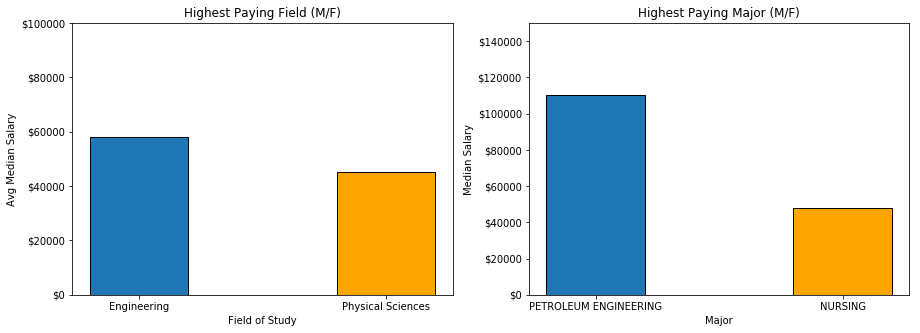

In [46]:
# creating the container and subplots
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# bar graph of male dominant engineer avg pay
ax1.bar(height = [male_field_pay[male_max_field]],
       x = [male_max_field], width = 0.4, 
       edgecolor = "black", color = "C0", 
      )

# bar graph of female dominant physical avg pay
ax1.bar(height = [female_field_pay[female_max_field]], 
        x = [female_max_field], width = 0.4,
        edgecolor = "black", color = "Orange",
      )

# bar graph of petroleum engineering median salary
ax2.bar(height = men_dominant[men_dominant["Major"] == male_max_pay_major]["Median"],
        x = [male_max_pay_major], width = 0.4,
        edgecolor = "black", color = "C0"
       )

# bar graph of nursing median salary
ax2.bar(height =  women_dominant[women_dominant["Major"] == female_max_pay_major]["Median"],
        x = [female_max_pay_major], width = 0.4,
        edgecolor = "black", color = "Orange"
       )

ax1.set_title("Highest Paying Field (M/F)")
ax1.set_xlabel("Field of Study")
ax1.set_ylabel("Avg Median Salary")


# adding the dollar sign
ax1.set_yticklabels(["$" + str(salary) for salary in (range(0,100001, 20000))]) 
ax1.set_ylim(0,100000)

ax2.set_yticklabels(["$" + str(salary) for salary in (range(0,140001, 20000))]) 
ax2.set_ylim(0,150000)

ax2.set_title("Highest Paying Major (M/F)")
ax2.set_xlabel("Major")
ax2.set_ylabel("Median Salary")

More and more do we see the effect of career choices on the gender pay gap. The average median salary of engineering makes a little less than twice the amount than that of education, yet there are more women with an education background than men with an engineering background. Education being the most women dominant field isn't even the highest paying field nor does it have the highest paying major. We can only encourage women so much to pursue fields with higher paying careers, but it is impossible to close the pay gap unless everyone have the same job with the same pay. We can also raise the wage of teachers to the level of engineers, but what about health and humanities? It's not that women wants to get paid less than men, it's just that the career paths they choose make less money. Just like how we have a natural unemployment rate, I consider the gender pay gap caused by career choices as a natural gender pay gap.

## Adjusted Gender Pay Gap

### Data Preparation

In [47]:
# the columns to use for the regression 
mod_recent_grads = pd.DataFrame(columns = ["Median", "Gender", "Total","Major", "Major_category"])

row = 0 # the row num of recent_grads
new_row = 0 # the row num of new data table

while row < len(recent_grads): # loop to have a row for male and female
    male_row = recent_grads.iloc[row]
    female_row = recent_grads.iloc[row]
    
    mod_recent_grads.loc[new_row] = male_row
    mod_recent_grads.loc[new_row + 1] = female_row
    
    new_row += 2
    row += 1
    
mod_recent_grads

,Median,Gender,Total,Major,Major_category
0,110000,NaN,2339.0,PETROLEUM ENGINEERING,Engineering
1,110000,NaN,2339.0,PETROLEUM ENGINEERING,Engineering
2,75000,NaN,756.0,MINING AND MINERAL ENGINEERING,Engineering
3,75000,NaN,756.0,MINING AND MINERAL ENGINEERING,Engineering
4,73000,NaN,856.0,METALLURGICAL ENGINEERING,Engineering
5,73000,NaN,856.0,METALLURGICAL ENGINEERING,Engineering
6,70000,NaN,1258.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
7,70000,NaN,1258.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
8,65000,NaN,32260.0,CHEMICAL ENGINEERING,Engineering
9,65000,NaN,32260.0,CHEMICAL ENGINEERING,Engineering


In [48]:
# to fill the NaN values in the Gender column
mod_recent_grads["Gender"] = ["Male", "Female"] * len(recent_grads)
mod_recent_grads

,Median,Gender,Total,Major,Major_category
0,110000,Male,2339.0,PETROLEUM ENGINEERING,Engineering
1,110000,Female,2339.0,PETROLEUM ENGINEERING,Engineering
2,75000,Male,756.0,MINING AND MINERAL ENGINEERING,Engineering
3,75000,Female,756.0,MINING AND MINERAL ENGINEERING,Engineering
4,73000,Male,856.0,METALLURGICAL ENGINEERING,Engineering
5,73000,Female,856.0,METALLURGICAL ENGINEERING,Engineering
6,70000,Male,1258.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
7,70000,Female,1258.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
8,65000,Male,32260.0,CHEMICAL ENGINEERING,Engineering
9,65000,Female,32260.0,CHEMICAL ENGINEERING,Engineering


In [49]:
# correct the values in the total column 
gender_amount = np.array([])

for i in range(len(recent_grads)):
    male_amount = recent_grads.iloc[i]["Men"] # the number of men in the major
    female_amount = recent_grads.iloc[i]["Women"] # the number of women in the major
    
    gender_amount = np.append(gender_amount, male_amount)
    gender_amount = np.append(gender_amount, female_amount)

mod_recent_grads["Total"] = gender_amount
mod_recent_grads

,Median,Gender,Total,Major,Major_category
0,110000,Male,2057.0,PETROLEUM ENGINEERING,Engineering
1,110000,Female,282.0,PETROLEUM ENGINEERING,Engineering
2,75000,Male,679.0,MINING AND MINERAL ENGINEERING,Engineering
3,75000,Female,77.0,MINING AND MINERAL ENGINEERING,Engineering
4,73000,Male,725.0,METALLURGICAL ENGINEERING,Engineering
5,73000,Female,131.0,METALLURGICAL ENGINEERING,Engineering
6,70000,Male,1123.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
7,70000,Female,135.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
8,65000,Male,21239.0,CHEMICAL ENGINEERING,Engineering
9,65000,Female,11021.0,CHEMICAL ENGINEERING,Engineering


### Encoding Categorical Data

In [50]:
# one hot encode columns with categorical data
mod_recent_grads = pd.get_dummies(mod_recent_grads, 
                                  columns = ["Gender","Major", "Major_category"],
                                  drop_first = True)
mod_recent_grads

,Median,Total,Gender_Male,Major_ACTUARIAL SCIENCE,Major_ADVERTISING AND PUBLIC RELATIONS,Major_AEROSPACE ENGINEERING,Major_AGRICULTURAL ECONOMICS,Major_AGRICULTURE PRODUCTION AND MANAGEMENT,Major_ANIMAL SCIENCES,Major_ANTHROPOLOGY AND ARCHEOLOGY,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,110000,2057.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,110000,282.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,75000,679.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,75000,77.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,73000,725.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,73000,131.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,70000,1123.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,70000,135.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,65000,21239.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,65000,11021.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Setting Independent and Dependent Variables

#### the independent variable is everything but the median

In [51]:
# independent variable everything after median
X = mod_recent_grads.iloc[:, 1:].values
X

array([[2.057e+03, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.820e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.790e+02, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.695e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.340e+02, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.640e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

#### the median is the dependent variable

In [52]:
# median is the dependent variable
Y = mod_recent_grads.iloc[:, 0].values
Y

array([110000, 110000, 75000, 75000, 73000, 73000, 70000, 70000, 65000,
       65000, 65000, 65000, 62000, 62000, 62000, 62000, 60000, 60000,
       60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000, 60000,
       60000, 58000, 58000, 57100, 57100, 57000, 57000, 56000, 56000,
       54000, 54000, 54000, 54000, 53000, 53000, 52000, 52000, 52000,
       52000, 51000, 51000, 50000, 50000, 50000, 50000, 50000, 50000,
       50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000,
       50000, 50000, 50000, 48000, 48000, 47000, 47000, 47000, 47000,
       46000, 46000, 46000, 46000, 46000, 46000, 45000, 45000, 45000,
       45000, 45000, 45000, 45000, 45000, 45000, 45000, 45000, 45000,
       45000, 45000, 45000, 45000, 45000, 45000, 44700, 44700, 44000,
       44000, 42000, 42000, 42000, 42000, 41300, 41300, 41000, 41000,
       41000, 41000, 40100, 40100, 40000, 40000, 40000, 40000, 40000,
       40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000,
       40000, 4000

### Data Scaling

In [53]:
# scaling with standard scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X = sc_X.fit_transform(X)
Y = Y.reshape(-1,1)
Y = np.squeeze(sc_Y.fit_transform(Y))

C:\Users\acesw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Adding X Intercept

In [54]:
x_intercept = np.ones(shape = (len(mod_recent_grads), 1)).astype(int)
mod_recent_grads.insert(1, "Constant", x_intercept)

### Updating Table

In [55]:
# updating the table with the scaled values
mod_recent_grads.iloc[:, 2:] = X
mod_recent_grads.iloc[:, 0] = Y
mod_recent_grads

,Median,Constant,Total,Gender_Male,Major_ACTUARIAL SCIENCE,Major_ADVERTISING AND PUBLIC RELATIONS,Major_AEROSPACE ENGINEERING,Major_AGRICULTURAL ECONOMICS,Major_AGRICULTURE PRODUCTION AND MANAGEMENT,Major_ANIMAL SCIENCES,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,6.118579,1,-0.500631,1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
1,6.118579,1,-0.551040,-1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
2,3.055932,1,-0.539766,1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
3,3.055932,1,-0.556862,-1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
4,2.880923,1,-0.538459,1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
5,2.880923,1,-0.555329,-1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
6,2.618411,1,-0.527156,1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
7,2.618411,1,-0.555215,-1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
8,2.180890,1,0.044132,1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978
9,2.180890,1,-0.246056,-1.0,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,-0.076472,...,-0.320256,2.220593,-0.273861,-0.309098,-0.205971,-0.076472,-0.173032,-0.248452,-0.234978,-0.234978


### OLS Regression

In [56]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y, exog = mod_recent_grads.iloc[:, 1:]).fit()
regressor_OLS.summary()

C:\Users\acesw\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.779e+29
Date:                Sun, 14 Oct 2018   Prob (F-statistic):               0.00
Time:                        17:28:54   Log-Likelihood:                 11229.
No. Observations:                 344   AIC:                        -2.211e+04
Df Residuals:                     170   BIC:                        -2.144e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Constant                                                                -2.203e-16   1.24e-16     -1.781      0.077   -4.64e-16    2.38e-17
Total                                                                    6.939e-17   2.88e-16      0.241      0.810   -4.98e-16    6.37e-16
Gender_Male                                                              2.307e-16   1.26e-16      1.831      0.069    -1.8e-17    4.79e-16
Major_ACTUARIAL SCIENCE                                                     0.1131   1.85e-16   6.13e+14      0.000       0.113       0.113
Major_ADVERTISING AND PUBLIC RELATIONS                                     -0.0151   1.12e-16  -1.35e+14      0.000      -0.015      -0.015
Major_AEROSPACE ENGINEERING                                                 0.0698   1.22e-16   5.73e+14      0.000       0.070       0.070
Major_AGRICULTURAL ECONOMICS                                               -0.0006   1.24e-16  -4.64e+12      0.000      -0.001      -0.001
Major_AGRICULTURE PRODUCTION AND MANAGEMENT                                -0.0006   1.24e-16  -4.66e+12      0.000      -0.001      -0.001
Major_ANIMAL SCIENCES                                                      -0.0671   1.24e-16  -5.42e+14      0.000      -0.067      -0.067
Major_ANTHROPOLOGY AND ARCHEOLOGY                                          -0.0521    1.2e-16  -4.33e+14      0.000      -0.052      -0.052
Major_APPLIED MATHEMATICS                                                   0.0236    1.2e-16   1.97e+14      0.000       0.024       0.024
Major_ARCHITECTURAL ENGINEERING                                             0.0299   1.22e-16   2.45e+14      0.000       0.030       0.030
Major_ARCHITECTURE                                                         -0.0632   1.22e-16  -5.19e+14      0.000      -0.063      -0.063
Major_AREA ETHNIC AND CIVILIZATION STUDIES                                 -0.0055    1.2e-16  -4.56e+13      0.000      -0.005      -0.005
Major_ART AND MUSIC EDUCATION                                              -0.0262   1.21e-16  -2.18e+14      0.000      -0.026      -0.026
Major_ART HISTORY AND CRITICISM                                            -0.0321   1.21e-16  -2.66e+14      0.000      -0.032      -0.032
Major_ASTRONOMY AND ASTROPHYSICS                                            0.1396   1.19e-16   1.17e+15      0.000       0.140       0.140
Major_ATMOSPHERIC SCIENCES AND METEOROLOGY                                 -0.0400   1.19e-16  -3.36e+14      0.000      -0.040      -0.040
Major_BIOCHEMICAL SCIENCES                                                 -0.0052    1.2e-16  -4.33e+13      0.000      -0.005      -0.005
Maj

Accounting for all the control variables in the regression, there is no evidence a gender pay gap. Using a significance level of 0.05, the Total and Gender_Male fail to reject the null hypothesis. Failure to reject the null hypothesis means that gender has no affect on the pay gap after ajusting for education.

# Gender Pay Gap Conclusion

In the unadjusted gender pay gap analysis, we found a gender pay gap of 26%. Meaning for every dollar a man makes, a woman will only make 74 cent of that dollar. Although the calculuation is done on only recent 2010-2012 college graduates, the unadjusted gender pay gap aligns with the unadjusted gender pay gap calculation done by Institute For Women's Policy Research [2010](https://iwpr.org/publications/the-gender-wage-gap-2010/) [2011](https://iwpr.org/publications/the-gender-wage-gap-2011/) [2012](https://iwpr.org/publications/the-gender-wage-gap-2012/).

The unadjusted wage gap is caused by the choice of study. Although there are more college educated women than there are men, women are more widespread in lower paying majors like education and health than their male counterpart. Women are more interested in people oriented fields while men are more interested in math and science fields. There are women in high paying STEM fields, but there are not enough to close the gap. 

It is possible that because of societal pressure, math and science passionate women are forced into "normal women fields". This kind of discrimination is what we are trying to find in our adjusted wage gap analysis. However, we found no sign of gender pay gap after adjusting for education. In reality, our adjusted gender pay gap result is inconclusive. The problem with trying to calculate the adjusted gender pay gap lies in the dataset we are using. Because we are only given the same median salary for both genders, the only thing that affects the average salary of men and women is the major. After accounting for the major, it makes sense to no longer have a gender wage gap.

This is a rather dissappointing conclusion, but we will revisit this project in the near future with a dataset fit for the job. For now, hopefully this project can help you see how much of an effect choice of study have on the pay gap.